In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Quadratic Feature Expansion

$x_i\in\mathbb{R}^2$  for $i=1,...,n$

$y_i\in\{-1,1\}$

$\phi(x)=(1, x_1, x_2, x_1x_2, x_1^2, x_2^2)$


x for y=-1 & square for y=1


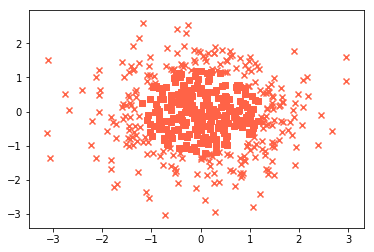

In [40]:
n = 500
x = np.ones([n, 3])   # add one dimension for the bias
x[:,1:] = np.random.normal(0,1,[n,2])  # Gaussian data
y = -np.ones(n)

for i in range(n):
    if x[i].dot(x[i])-1<1.5:
        y[i] = 1
        plt.scatter(x[i,1], x[i,2], marker='s', c='tomato')
    else:
        plt.scatter(x[i,1], x[i,2], marker='x', c='tomato')

print("x for y=-1 & square for y=1")
plt.show()

## Learning by ERM

By $z=\phi(x)$, learn $y = \beta^{\top}z$

ERM (Empirical Risk Minimization): $\min_{\beta} \frac{1}{n}\|Z\beta-Y\|^2$

Normal Equation: $(Z^{\top}Z)\beta=Z^{\top}Y$

In [41]:
Z = np.zeros([n, 6])
Z[:,:3] = x
Z[:,3] = x[:,1] * x[:,2]
Z[:,4:] = x[:,1:]**2

In [42]:
ZZ = Z.transpose().dot(Z)
ZY = Z.transpose().dot(y)
beta = np.linalg.inv(ZZ).dot(ZY)
print(beta)

[ 0.72705256 -0.06020753 -0.05427931  0.03120235 -0.34384841 -0.38131536]


## Optimal Linear Classifier after Expansion

$y = \begin{cases}
1&\beta^{\top}z\geq0\\
-1&\beta^{\top}z<0
\end{cases}$

In [43]:
def f(x):
    # beta0 for bias
    y = beta[0] + beta[1]*x[1] + beta[2]*x[2] + beta[3]*x[1]*x[2]\
        + beta[4]*(x[1]**2) + beta[5]*(x[2]**2)
    return y

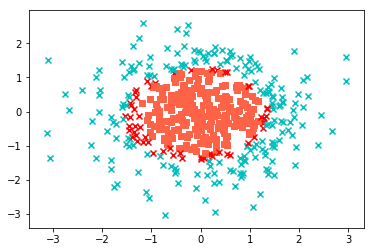

In [44]:
for i in range(n):
    if x[i].dot(x[i])-1 < 1.5 and f(x[i]) > 0:
        plt.scatter(x[i,1], x[i,2], marker='s', c='tomato')
    elif x[i].dot(x[i])-1 > 1.5 and f(x[i]) > 0:
        plt.scatter(x[i,1], x[i,2], marker='x', c='r')
    elif x[i].dot(x[i])-1 < 1.5 and f(x[i]) <= 0:
        plt.scatter(x[i,1], x[i,2], marker='s', c='c')
    elif x[i].dot(x[i])-1 > 1.5 and f(x[i]) <= 0:
        plt.scatter(x[i,1], x[i,2], marker='x', c='c')